# RecordLinkage Linking

> Leveraging the RL library to determine approximate matching over a range of fields using various methods.

In [1]:
import json
import pandas
import time
import os
import recordlinkage
import csv
import core_constants as cc
import functions as fx

#not currently using jellyfish
import jellyfish as jf

In [2]:
features = pandas.read_pickle("features.pkl")

In [3]:
features['sum'] = (features['playerName'] + features['college'] + features['city'] + features['state'] + features['highSchool'] + features['year'] + features['position'])/7
features.describe()

,ID,playerName,college,city,state,highSchool,position,year,sum
count,1.055515e+06,1.055515e+06,1055515.0,1.055515e+06,1.055515e+06,1.055515e+06,1.055515e+06,1055515.0,1.055515e+06
mean,3.847127e-02,1.866622e-01,1.0,1.728563e-01,2.989432e-01,1.604014e-01,3.858496e-02,1.0,4.082069e-01
std,1.923311e-01,1.888184e-01,0.0,2.131149e-01,4.577951e-01,1.874018e-01,1.926037e-01,0.0,1.221639e-01
min,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,2.857143e-01
25%,0.000000e+00,8.333333e-02,1.0,7.692308e-02,0.000000e+00,7.142857e-02,0.000000e+00,1.0,3.344156e-01
50%,0.000000e+00,1.538462e-01,1.0,1.250000e-01,0.000000e+00,1.250000e-01,0.000000e+00,1.0,3.572727e-01
75%,0.000000e+00,2.142857e-01,1.0,2.000000e-01,1.000000e+00,1.875000e-01,0.000000e+00,1.0,4.710884e-01
max,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00


<AxesSubplot:>

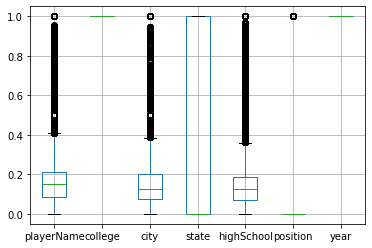

In [4]:
# Fun to run but not necessary
features.boxplot(column=['playerName', 'college', 'city', 'state', 'highSchool', 'position', 'year'])

In [5]:
not_id = features[features['sum'] > .65]
#not_id = features[features['id'] != 1]
#not_id = (not_id.loc[not_id['sum'] > .80])

In [6]:
not_id.describe()

,ID,playerName,college,city,state,highSchool,position,year,sum
count,49148.000000,49148.000000,49148.0,49148.000000,49148.000000,49148.000000,49148.000000,49148.0,49148.000000
mean,0.803980,0.860776,1.0,0.906713,0.998230,0.828094,0.314865,1.0,0.844097
std,0.396988,0.302963,0.0,0.257744,0.042036,0.301589,0.464467,0.0,0.096585
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.650000
25%,1.000000,1.000000,1.0,1.000000,1.000000,0.692308,0.000000,1.0,0.769231
50%,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.0,0.857143
75%,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,0.857143
max,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [7]:
not_id.to_pickle("not_id.pkl")

In [8]:
with open("..//noid.csv", "w", encoding="utf-8") as write_file:
                write_file.write(not_id.to_csv())